# Tipsbet Analysis


## Initialisation

In [1]:
from tips import Tips
import datetime as dt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.style.use('dark_background')
plt.style.use('seaborn')

## Load Data
The Tips module loads data all the data between the given start and end dates (both default to today if not given)

In [3]:
start = dt.datetime.now() - dt.timedelta(days=1000)
t = Tips(start)
t.full_dataset.Time.min()

Timestamp('2017-10-27 12:30:00.756813')

## Analysis

In [15]:
t.df[t.df.Time >= pd.to_datetime(dt.date.today())].Odds.agg('prod')

56.870993678231365

In [4]:
print(t.df.Time.dt.date.min(), '-', t.df.Time.dt.date.max())
print(t.df.Status.value_counts().to_string() + '\n')
print((t.df.Status.value_counts(normalize=True).round(4) * 100).to_string())

2017-10-30 - 2020-07-26
W    9352
L    3427
?      62

W    72.83
L    26.69
?     0.48


In [5]:
print(t.df.groupby('Sport').Status.value_counts().to_string())
print((t.df.groupby('Sport').Status.value_counts(normalize=True).round(4) * 100).to_string())

Sport       Status
Basketball  W          524
            L          224
            ?            4
Football    W         7981
            L         2857
            ?           54
Tennis      W          847
            L          346
            ?            4
Sport       Status
Basketball  W         69.68
            L         29.79
            ?          0.53
Football    W         73.27
            L         26.23
            ?          0.50
Tennis      W         70.76
            L         28.91
            ?          0.33


In [6]:
# t._update_dataset(t.full_dataset)
# t.store_df()

In [7]:
fd = t.full_dataset
stake = 1
profits = (fd[fd.Time > dt.datetime(2020, 1, 1)].Profit * stake)
avg_profit = fd.Profit.mean()
profits.sum()

-96.87000000000002

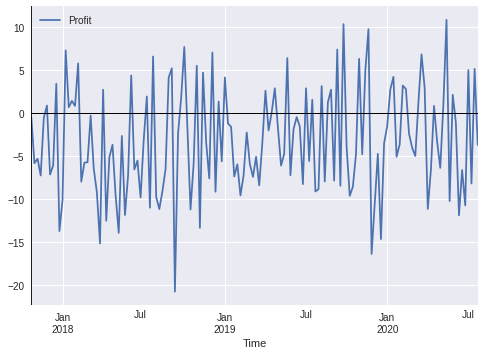

In [8]:
filtered = fd[fd.Time < dt.datetime(2020,7,23)].resample('1W', on='Time').agg({'Profit': 'sum', 'Odds': 'mean', 'Sport': 'size'})
ax = filtered.plot(y='Profit')
ax.axhline(y=0, color='k', linewidth=1)
ax.axvline(x=fd.Time.min(), color='k')

In [9]:
sample = fd.copy()
sample['Select'] = (np.random.random(size=sample.Sport.size) < 0.9) * sample.Return
# sample.Select = sample.Select.replace(0, 1)
print(sample.Select.max())
print((sample.resample('1D', on='Time').agg({'Select': 'prod', 'Odds': 'size'}).Select.replace(0, -1) * stake).sum())
stake

2.45
-846.9745676722953


1

In [10]:
t.df[t.df.Odds <= 1.3].Status.value_counts(normalize=True).round(4) * 100
print(t.df.columns)

Index(['Time', 'Country', 'Sport', 'Competitions', 'Teams', 'Tip', 'Odds',
       'Results', 'Status', 'Return', 'Profit'],
      dtype='object')


In [11]:
t.df['Return'].value_counts()

0.00    3489
1.22    1401
1.20    1386
1.25    1046
1.44     474
        ... 
1.78       1
1.56       1
1.54       1
1.76       1
2.45       1
Name: Return, Length: 73, dtype: int64

### Plotting
Plot a bar chart of the results for a particular column

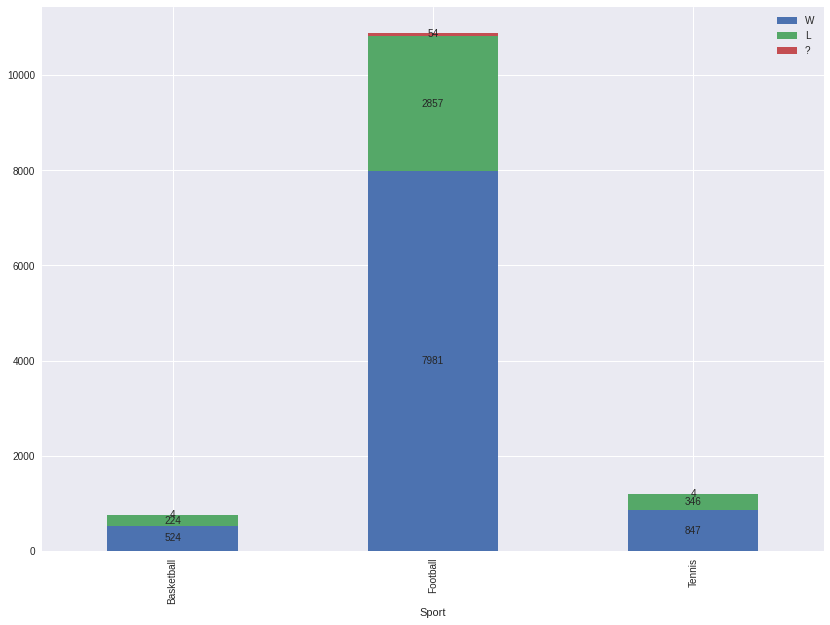

In [12]:
t.plot_status(by='Sport', relative=False)

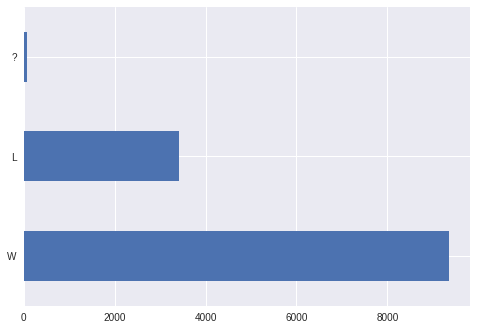

In [13]:
t.df.Status.value_counts().plot(kind='barh')